# k-Nearest-Neighbour-Algorithmus (k-NN)
## Einführung

- Grundidee: Klassifikation / Regression eines gegebenen Punktes $x$ basierend auf $k$ nächsten Nachbarn aus Trainingsdatensatz
- Unterscheidung von k-NN-Klassifikation und k-NN-Regression

## Beispiel: Klassifikation Liliendatensatz

In [1]:
import numpy as np
import sklearn

# Laden des Datensets
dataset = sklearn.datasets.load_iris()

data = dataset.data
label = dataset.target

print(data.shape)
print(label.shape)

(150, 4)
(150,)


In [2]:
# Aufteilung in Test- und Trainingsdaten
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data, label, test_size=0.8, random_state=42)

print(X_train.shape)
print(X_test.shape)

(30, 4)
(120, 4)


In [3]:
def plain_knn_classification(x_pred, X_train, y_train, k, normOrd=None):
    x_min = X_train.min(axis=0)
    x_max = X_train.max(axis=0)
    
    # skalieren auf [0,1]
    X_train = (X_train - x_min) / (x_max - x_min)
    x_pred = (x_pred - x_min) / (x_max - x_min)
    
    diff = X_train - x_pred
    dist = np.linalg.norm(diff, axis=1, ord=normOrd)
    
    k_nearest = np.argsort(dist)[:k]
    (classification, counts) = np.unique(y_train[k_nearest], return_counts=True)
    chosen_class = np.argmax(counts)
    
    return classification[chosen_class]

In [4]:
errors = 0

for i in range(len(y_test)):
    x_pred = X_test[i,:]
    y_real = y_test[i]
    
    y_pred = plain_knn_classification(x_pred, X_train, y_train, k=3)
    if y_pred != y_real:
        errors = errors + 1
        print(f'{x_pred} wurde als {y_pred} statt {y_real} klassifiziert')

print(f'\nmade {errors} error(s) in total,',
      f'that is {errors / y_test.size * 100:.2f}% in total')

[6.3 2.8 5.1 1.5] wurde als 1 statt 2 klassifiziert
[6.7 3.  5.  1.7] wurde als 2 statt 1 klassifiziert
[5.9 3.2 4.8 1.8] wurde als 2 statt 1 klassifiziert
[6.  2.7 5.1 1.6] wurde als 2 statt 1 klassifiziert
[6.1 2.6 5.6 1.4] wurde als 1 statt 2 klassifiziert
[6.  2.2 5.  1.5] wurde als 1 statt 2 klassifiziert

made 6 error(s) in total, that is 5.00% in total


In [5]:
y_preds = []

for (x_test, y_real) in zip(X_test, y_test):
    y_pred = plain_knn_classification(x_test, X_train, y_train, k=3)
    y_preds.append(y_pred)
y_preds = np.array(y_preds)

errors = np.count_nonzero(y_preds != y_test)
print(f'made {errors} error(s) in total,',
      f'that is {errors / y_test.size * 100:.2f}% in total')

made 6 error(s) in total, that is 5.00% in total


## Beispiel: Klassifikation Two Moons Problem

In [6]:
%reset -f

import numpy as np
import sklearn

# Datensatz laden
X, y = sklearn.datasets.make_moons(n_samples=240, random_state=42, noise=0.15)

print(X.shape)
print(y.shape)

(240, 2)
(240,)


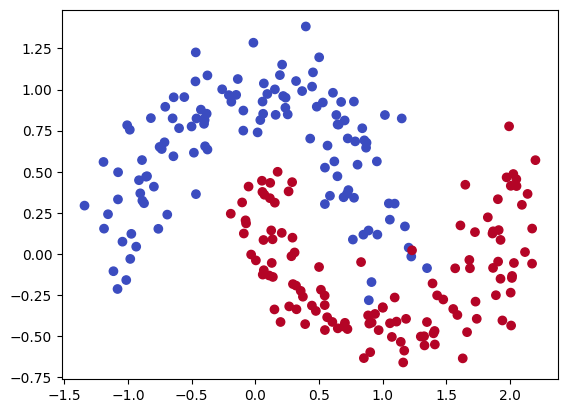

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

# TODO: decision boundary

In [8]:
def plain_knn_classification(x_pred, X_train, y_train, k, normOrd=None):
    x_min = X_train.min(axis=0)
    x_max = X_train.max(axis=0)
    
    # skalieren auf [0,1]
    X_train = (X_train - x_min) / (x_max - x_min)
    x_pred = (x_pred - x_min) / (x_max - x_min)
    
    diff = X_train - x_pred
    dist = np.linalg.norm(diff, axis=1, ord=normOrd)
    
    k_nearest = np.argsort(dist)[:k]
    (classification, counts) = np.unique(y_train[k_nearest], return_counts=True)
    chosen_class = np.argmax(counts)
    
    return classification[chosen_class]

In [9]:
# Aufteilung in Test- und Trainingsdaten
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.8, random_state=42)

print(X_train.shape)
print(X_test.shape)

(48, 2)
(192, 2)


In [10]:
import matplotlib.pyplot as plt

def predict_and_plot(norm, k=3):
    y_preds = []

    for (x_test, y_real) in zip(X_test, y_test):
        y_pred = plain_knn_classification(x_test, X_train, y_train, k=3, normOrd=norm)
        y_preds.append(y_pred)
    y_preds = np.array(y_preds)

    errors = np.count_nonzero(y_preds != y_test)
    print(f'made {errors} error(s) in total,',
          f'that is {errors / y_test.size * 100:.2f}% in total')
    
    # falsch klassifizierte Punkte in rot dargestellt
    plt.scatter(X_test[:,0], X_test[:,1], c=(y_preds != y_test), cmap='coolwarm')
    plt.show()

using 2-norm
made 9 error(s) in total, that is 4.69% in total


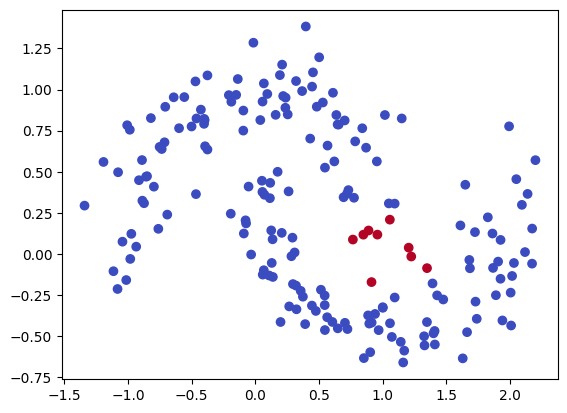

using max-norm
made 6 error(s) in total, that is 3.12% in total


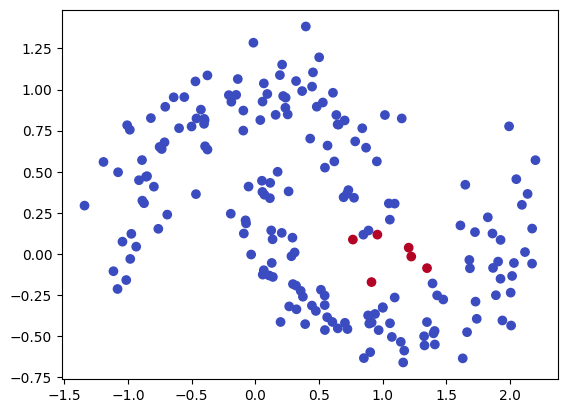

In [11]:
k = 3

print('using 2-norm')
predict_and_plot(None, k)

print('using max-norm')
predict_and_plot(np.inf, k)

## Numerische Eigenschaften

- *Lazy-Learning*-Algorithmus $\to$ Hauptarbeit zur Zeit der Anfrage statt Training (vgl. *Eager Learning*)
    - Bildung des Modells lokal um Abfragepunkt $\to$ ggf. genauer als globale Modelle
    - Schwäche: Aufwand pro Anfrage, Berechnung wächst linear mit Größe der Trainingsdaten
    - ggf. Mischansatz, bspw. $k$-dimensionaler Baum (*KD Tree*)
        - unbalancierter Suchbaum, ggf. schnelleres Auffinden der $k$ nächsten Nachbarn
- wenig bis keine Parameter
    - $k$: Suchfeld der nächsten Nachbarn für Klassifikation / Regression
    - verwendete Norm (euklidisch (2), Manhatten (3), Max-Norm)
    - vorteilhaft, vgl. stark parametrisierte Verfahren (bspw. Neuronale Netze)
- Güte stark abhängig von Dichte und Anordnung / Dimensionalität der vorliegenden Daten im Raum
    - ggf. Dimensionsreduktion als Pre-Processing

## Mit `scikit-learn`

In [12]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

made 8 error(s) in total, that is 4.17% in total


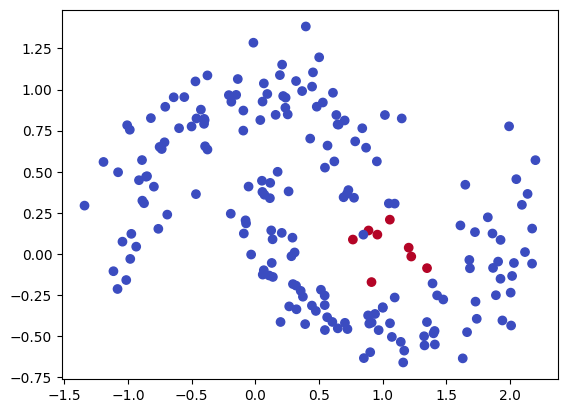

In [13]:
errors = np.count_nonzero(y_preds != y_test)
print(f'made {errors} error(s) in total,',
      f'that is {errors / y_test.size * 100:.2f}% in total')

# falsch klassifizierte Punkte in rot dargestellt
plt.scatter(X_test[:,0], X_test[:,1], c=(y_preds != y_test), cmap='coolwarm')
plt.show()

### Brute-Force vs. KD-Tree

In [14]:
X, y = sklearn.datasets.make_moons(n_samples=100_000, random_state=42, noise=0.1)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.8, random_state=42)

In [15]:
import time
start_time = time.time()

print('--- Brute Force ---')

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3, metric='euclidean', algorithm='brute')
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

errors = np.count_nonzero(y_preds != y_test)
print(f'made {errors} error(s) in total,',
      f'that is {errors / y_test.size * 100:.2f}% in total')

print(f'{time.time() - start_time} seconds')

--- Brute Force ---
made 69 error(s) in total, that is 0.09% in total
1.1734371185302734 seconds


In [16]:
start_time = time.time()

print('--- KD-Tree ---')

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3, metric='euclidean', algorithm='kd_tree')
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

errors = np.count_nonzero(y_preds != y_test)
print(f'made {errors} error(s) in total,',
      f'that is {errors / y_test.size * 100:.2f}% in total')

print(f'{time.time() - start_time} seconds')

--- KD-Tree ---
made 69 error(s) in total, that is 0.09% in total
0.7509281635284424 seconds


## Weiterführende Literatur

- [1] weiterführend zu bspw. Nearest-Neighbour-Algorithmen, Regression, Komponentenanalyse etc.
- [2] weiterführend zu bspw. KD-Tree, Regression, *Smear*, Abstandsgewichtung


## Literatur

[1] J. Frochte, „Maschinelles Lernen – Überblick und Abgrenzung“, in Maschinelles Lernen, Deutschland: Hanser, 2018, S. 110–116.

[2] scikit-learn developers, „1.6. Nearest Neighbors“, scikit-learn. Zugegriffen: 11. April 2025. [Online]. Verfügbar unter: https://scikit-learn/stable/modules/neighbors.html